# In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables. 

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
# Reading data from the data given in the link
url = "http://bit.ly/w-data"
dataset= pd.read_csv(url)
print("Data imported successfully")
dataset.head(12)


Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# To see statistical details of the dataset, we can use describe(): 

In [2]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Now let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data 

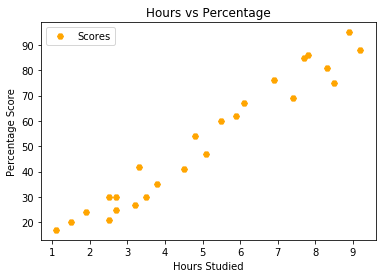

In [3]:
dataset.plot(x='Hours', y='Scores', style='H', color='orange')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()


### Preparing the Data, to predict the percentage score depending upon the hours studied. Therefore our attribute set will consist of the "Hours" column, and the label will be the "Score" column. Therefore we have to extract the attributes and labels.The next step is to divide the data into "attributes" (inputs) and "labels" (outputs). 

In [4]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values


### the next step is to split this data into training and test sets ,80% of the data to training set while 20% of the data to test set. The test_size variable is where we actually specify the proportion of test set.  

In [5]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 


# Training the Algorithm 

In [6]:
# fit() is used to fit the essential training data to the training part of the modeling process
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print('TRAINING COMPLETE')


TRAINING COMPLETE


# Plotting the regression line

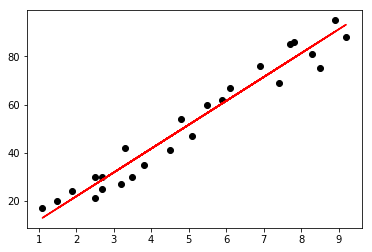

In [7]:
line = regressor.coef_*X+regressor.intercept_
# Plotting for the test data
plt.scatter(X, y, color= 'black')
plt.plot(X, line, color='red');
plt.show()


# Making Predictions

In [8]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores


[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [9]:
# Comparing Actual vs Predicted
dataset = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
dataset



,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# You can also test with your own data 

In [10]:

hours = float(input(" enter the hours the student studied"))
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))



 enter the hours the student studied9.25
No of Hours = 9.25
Predicted Score = 93.69173248737538


# Evaluating the model  

In [13]:
#The final step is to evaluate the performance of algorithm.
#This step is particularly important to compare how well different algorithms perform on a particular dataset. 
#For simplicity here, we have chosen the mean square error. 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
